## Transfer Learning VGG 16 using Keras

In [1]:
!nvidia-smi

Sat Mar 11 09:55:27 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
ROOT_PATH = '/content/drive/MyDrive/DeepLearning/Cat_Dog-Project'

In [6]:
!pwd

/content


In [7]:
import os
os.chdir(ROOT_PATH)
os.getcwd()

'/content/drive/MyDrive/DeepLearning/Cat_Dog-Project'

In [8]:
!ls

'Cat-Dog by VGG16.ipynb'   cat.jpg   dog.jpg   PetImages


In [9]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'PetImages/train'
valid_path = 'PetImages/validation'


In [10]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 3s 0us/step


In [11]:
# don't train existing weights
for layer in vgg16.layers:
  print(layer)

In [12]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [13]:
for layer in vgg16.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [14]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [15]:
  # useful for getting number of output classes
folders = glob('PetImages/train/*')

In [16]:
folders

['PetImages/train/Dog', 'PetImages/train/Cat']

In [17]:
# Number of label classes

len(folders)

2

In [18]:
model = Sequential()

model.add(vgg16)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(2,activation='softmax'))

In [19]:
# view the structure of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 256)               6422784   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 21,137,986
Trainable params: 6,423,298
Non-trainable params: 14,714,688
_________________________________________________________________


In [21]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [22]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [23]:
!pwd

/content/drive/MyDrive/DeepLearning/Cat_Dog-Project


In [24]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('PetImages/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 337 images belonging to 2 classes.


In [25]:
test_set = test_datagen.flow_from_directory('PetImages/validation',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 59 images belonging to 2 classes.


In [26]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/10
11/11 [==============================] - 129s 11s/step - loss: 2.4303 - accuracy: 0.5668 - val_loss: 0.4260 - val_accuracy: 0.8136
Epoch 2/10
11/11 [==============================] - 6s 564ms/step - loss: 0.3585 - accuracy: 0.8309 - val_loss: 0.6861 - val_accuracy: 0.7627
Epoch 3/10
11/11 [==============================] - 5s 469ms/step - loss: 0.2455 - accuracy: 0.9110 - val_loss: 0.5062 - val_accuracy: 0.8136
Epoch 4/10
11/11 [==============================] - 6s 604ms/step - loss: 0.1583 - accuracy: 0.9436 - val_loss: 0.4651 - val_accuracy: 0.8305
Epoch 5/10
11/11 [==============================] - 5s 472ms/step - loss: 0.0888 - accuracy: 0.9733 - val_loss: 0.4659 - val_accuracy: 0.8136
Epoch 6/10
11/11 [==============================] - 6s 571ms/step - loss: 0.0854 - accuracy: 0.9585 - val_loss: 0.4739 - val_accuracy: 0.8136
Epoch 7/10
11/11 [==============================] - 6s 555ms/step - loss: 0.0806 - accuracy: 0.9763 - val_loss: 0.4967 - val_accuracy: 0.7966
Epoch 

In [27]:
import matplotlib.pyplot as plt

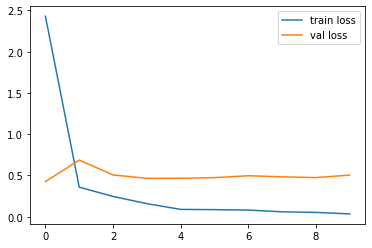

<Figure size 432x288 with 0 Axes>

In [28]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

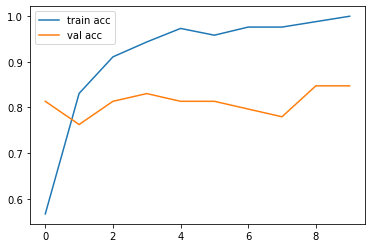

<Figure size 432x288 with 0 Axes>

In [29]:
# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [30]:
# save it as a h5 file
from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [31]:
y_pred = model.predict(test_set)

2/2 [==============================] - 0s 151ms/step


In [32]:
y_pred

array([[8.1457021e-03, 9.9185431e-01],
       [9.0492189e-01, 9.5078081e-02],
       [7.3738821e-04, 9.9926263e-01],
       [6.4154523e-03, 9.9358457e-01],
       [9.6498668e-01, 3.5013337e-02],
       [9.9996066e-01, 3.9279079e-05],
       [4.0311110e-03, 9.9596894e-01],
       [9.9993813e-01, 6.1911247e-05],
       [3.9106183e-02, 9.6089381e-01],
       [5.1045208e-03, 9.9489540e-01],
       [9.6664697e-01, 3.3353042e-02],
       [8.7223279e-01, 1.2776721e-01],
       [9.6556985e-01, 3.4430224e-02],
       [4.9896038e-04, 9.9950099e-01],
       [3.9893538e-03, 9.9601066e-01],
       [9.2317796e-01, 7.6822020e-02],
       [9.9872547e-01, 1.2744732e-03],
       [6.4003460e-02, 9.3599653e-01],
       [3.2444435e-01, 6.7555565e-01],
       [5.2964695e-02, 9.4703537e-01],
       [4.4422439e-01, 5.5577558e-01],
       [5.4110712e-03, 9.9458897e-01],
       [9.8893154e-01, 1.1068386e-02],
       [9.9957508e-01, 4.2488764e-04],
       [7.1222562e-01, 2.8777441e-01],
       [3.5790300e-01, 6.

In [33]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [34]:
y_pred

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [35]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [36]:
model=load_model('model_vgg16.h5')

In [37]:
img=image.load_img('cat.jpg',target_size=(224,224))

In [38]:
x=image.img_to_array(img)
x

array([[[ 36.,  41.,  37.],
        [ 38.,  42.,  41.],
        [ 38.,  42.,  43.],
        ...,
        [200., 200., 166.],
        [200., 198., 160.],
        [203., 201., 162.]],

       [[ 38.,  43.,  39.],
        [ 39.,  43.,  42.],
        [ 40.,  44.,  45.],
        ...,
        [208., 205., 172.],
        [205., 203., 165.],
        [204., 202., 163.]],

       [[ 42.,  47.,  43.],
        [ 40.,  44.,  43.],
        [ 40.,  44.,  45.],
        ...,
        [201., 198., 167.],
        [201., 196., 164.],
        [197., 193., 158.]],

       ...,

       [[ 30.,  28.,  29.],
        [ 24.,  22.,  23.],
        [ 21.,  19.,  20.],
        ...,
        [ 47.,  34.,  28.],
        [ 40.,  27.,  21.],
        [ 52.,  41.,  35.]],

       [[ 34.,  32.,  33.],
        [ 27.,  25.,  26.],
        [ 24.,  22.,  23.],
        ...,
        [ 45.,  32.,  24.],
        [ 44.,  31.,  23.],
        [ 65.,  55.,  46.]],

       [[ 30.,  28.,  29.],
        [ 26.,  24.,  25.],
        [ 24.,  

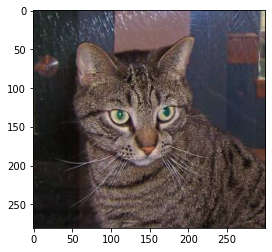

In [39]:
Z = plt.imread('cat.jpg')
plt.imshow(Z)

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
from keras.applications.vgg16 import preprocess_input

In [43]:
import numpy as np

# Adding batch size -->> Extra dimension
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

1/1 [==============================] - 1s 886ms/step


array([[0.99428636, 0.00571368]], dtype=float32)

In [45]:
result = np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 20ms/step


In [46]:
result[0]

0

In [47]:
if result[0] == 1:
    prediction = 'dog'
    print(prediction)
else:
    prediction = 'cat'
    print(prediction)

cat
